Ваша задача построить сеть для произвольного семантического поля, где узлами будут слова, а ребрами наличие косинусного расстояния больше 0.5 в word2vec-модели. Вычислите самые центральные слова графа, его радиус (для каждой компоненты связности) и коэффициент кластеризации.

https://github.com/ancatmara/learnpython2017/blob/master/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/word2vec.ipynb

https://github.com/ancatmara/learnpython2017/blob/master/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/%D0%93%D1%80%D0%B0%D1%84%D1%8B%2C%20networkx.ipynb

In [1]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
m = 'ruscorpora.bin.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2018-06-04 21:05:26,581 : INFO : loading projection weights from ruscorpora.bin.gz
2018-06-04 21:05:40,622 : INFO : loaded (173816, 600) matrix from ruscorpora.bin.gz


In [3]:
model.init_sims(replace=True)

2018-06-04 21:05:40,640 : INFO : precomputing L2-norms of word weight vectors


In [4]:
#берем со страницы: http://www.labinform.ru/pub/ruthes/c/18/000/107233.htm
words=["болт_NOUN", "брусок__NOUN", "валик_NOUN", "гвоздь_NOUN", "гриф_NOUN", "грифель_NOUN", "игла_NOUN", "катушка_NOUN", "ключ_NOUN", "крюк_NOUN", "маятник_NOUN", "спица_NOUN", "ствол_NOUN", "стержень_NOUN", "стрела_NOUN", "якорь_NOUN", "штопор_NOUN"]

In [5]:
love_words=["любить_VERB", "возлюбить_VERB", "любовь_NOUN", "роман_NOUN", "кавалер_NOUN", "втюриться_VERB", "втрескаться_VERB", "влюбленность_NOUN", "фаворит_NOUN", "боготворить_VERB", "увлечься_VERB", "влюбиться_VERB", "обожать_VERB", "любимец_NOUN", "любимый_ADJ", "ухажер_NOUN", "нравиться_VERB", "приглянуться_VERB", "подруга_NOUN", "бойфренд_NOUN", "парень_NOUN", "девушка_NOUN", "возлюбленный_ADJ", "муж_NOUN", "жена_NOUN"]

In [6]:
print(len(love_words))

25


In [8]:
import networkx as nx
G = nx.Graph() # пустой граф

In [9]:
word_count=0
for word in love_words:
    # есть ли слово в модели? Может быть, и нет
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        #print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        G.add_node(word)
        word_count+=1
        for i in model.most_similar(positive=[word]):
            # слово + коэффициент косинусной близости
            if i[1]>0.5:
                print(i[0], i[1])
                word_count+=1
                if i[0] not in G.nodes():
                    G.add_node(i[0])
                    #word_count+=1
                    G.add_edge(word, i[0])
                
                else:
                    G.add_edge(word, i[0])
        print('\n')
    else:
        # Увы!
        print(word + ' is not present in the model')

любить_VERB
обожать_VERB 0.6667430996894836
любя_ADV 0.5887188911437988
полюбить_VERB 0.5882232189178467
нравиться_VERB 0.5621114373207092
ненавидеть_VERB 0.561311662197113
уважать_VERB 0.544309675693512
невеститься_VERB 0.5196250677108765
заобожать_VERB 0.5127866268157959
незванов_NOUN 0.506231963634491
приохочиваться_VERB 0.5062108635902405


возлюбить_VERB
любяй_ADV 0.5704824924468994
долготерпеть_VERB 0.5394837856292725
возлюбиши_NOUN 0.5365705490112305
препобеждать_VERB 0.5354493856430054
любить_NOUN 0.5354045629501343
избра_NOUN 0.5350093841552734
милосердствовать_VERB 0.5267910957336426
ущедрять_VERB 0.5249061584472656
жизнодавец_NOUN 0.5241842269897461
вселюбящий_ADJ 0.5203185081481934


любовь_NOUN
любовия_NOUN 0.5365736484527588
привязанность_NOUN 0.5360060334205627
привязанностия_NOUN 0.53233802318573
влюбленность_NOUN 0.5265418887138367
неосуждение_NOUN 0.5196216702461243
милосердствовать_VERB 0.5143858790397644
сострадательность_NOUN 0.5129035115242004
жаление_NOUN 0.51160

## визуализируем граф полностью

In [ ]:

import matplotlib.pyplot as plt 

pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
nx.draw_networkx_edges(G, pos, edge_color='yellow') # рисуем рёбра жёлтым
nx.draw_networkx_labels(G, pos, font_size=1, font_family='Arial') #берем лэйблы
plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
plt.show() # что получилось?

## визуализируем компоненты связности

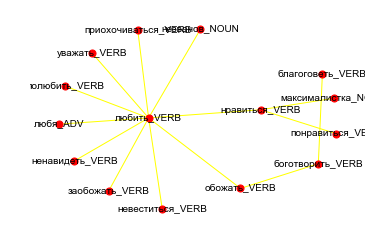

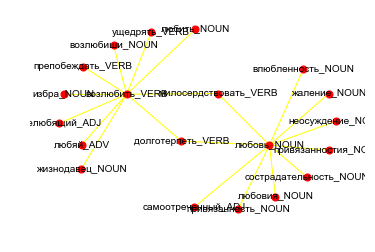

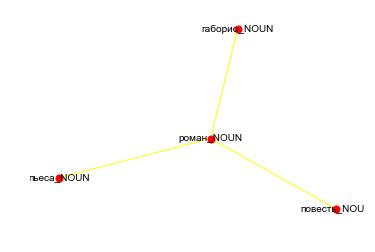

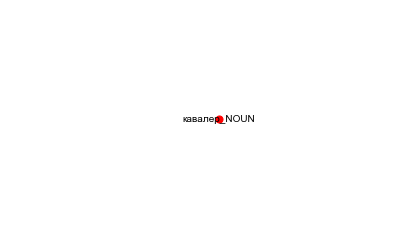

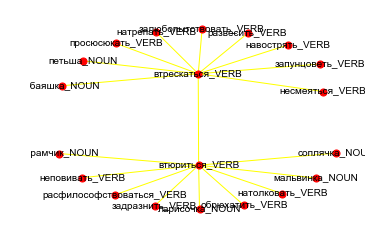

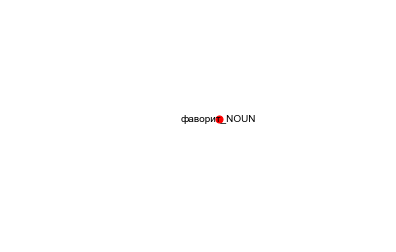

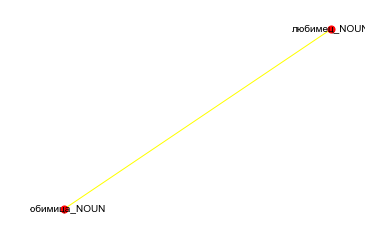

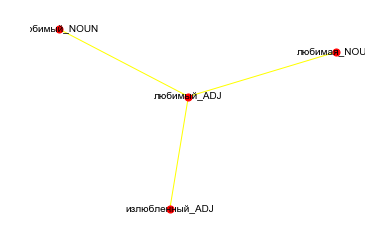

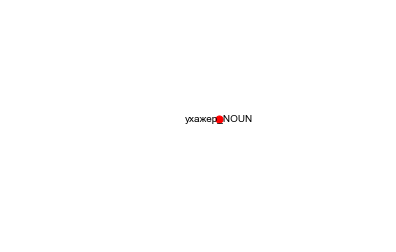

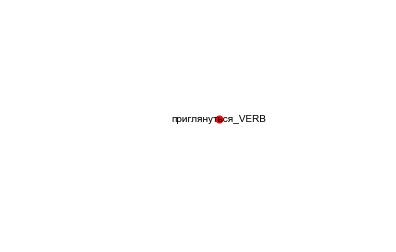

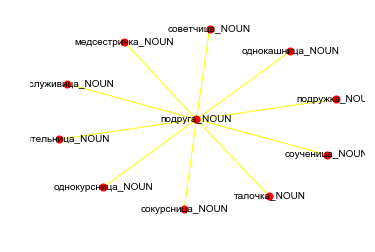

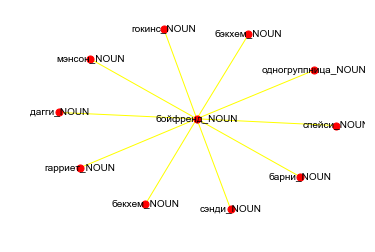

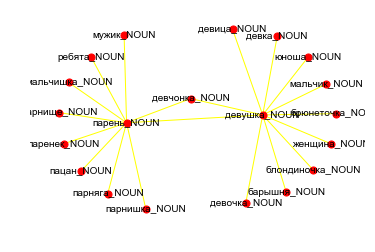

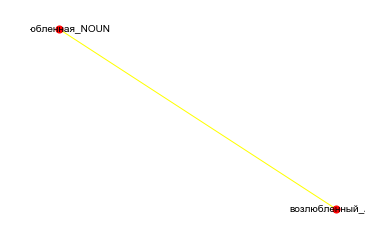

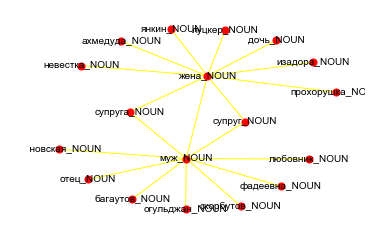

In [15]:
import matplotlib.pyplot as plt
groups=nx.connected_component_subgraphs(G)
for g in groups:
    pos=nx.spring_layout(g)
    nx.draw_networkx_nodes(g, pos, node_color='red', node_size=50) # рисуем узлы красным цветом, задаём размер узла
    nx.draw_networkx_edges(g, pos, edge_color='yellow') # рисуем рёбра жёлтым
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='Arial') #берем лэйблы
    plt.axis('off') # по умолчанию график будет снабжён осями с координатами, здесь они бессмысленны, так что отключаем
    plt.show() # что получилось?

## центральные слова по каждому сабграфу

In [29]:
groups=nx.connected_component_subgraphs(G)
for g in groups:
    if len(g)>1:
        deg=nx.degree_centrality(g)
        degs_in_subgraph = sorted(deg.items(), key=lambda x: x[1], reverse=True)
    #print(degs_in_subgraph)
        d_count=0
        biggest_value = degs_in_subgraph[0][1]
    #print(biggest_value)
        for d in degs_in_subgraph:
            if d[1]==biggest_value:
                try:
                    print(d[0]+', degree is '+str(d[1]))
                    d_count+=1
                except:
                    pass
            #print(d)
        #print(d_count)
        
    else:
        print(g.nodes()[0]+', isolated subgraph')

любить_VERB, degree is 0.7142857142857142
любовь_NOUN, degree is 0.5263157894736842
возлюбить_VERB, degree is 0.5263157894736842
роман_NOUN, degree is 1.0
кавалер_NOUN, isolated subgraph
втрескаться_VERB, degree is 0.5263157894736842
втюриться_VERB, degree is 0.5263157894736842
фаворит_NOUN, isolated subgraph
любимец_NOUN, degree is 1.0
любимица_NOUN, degree is 1.0
любимый_ADJ, degree is 1.0
ухажер_NOUN, isolated subgraph
приглянуться_VERB, isolated subgraph
подруга_NOUN, degree is 1.0
бойфренд_NOUN, degree is 1.0
девушка_NOUN, degree is 0.5789473684210527
возлюбленная_NOUN, degree is 1.0
возлюбленный_ADJ, degree is 1.0
муж_NOUN, degree is 0.5882352941176471
жена_NOUN, degree is 0.5882352941176471
b


In [11]:
groups=nx.connected_component_subgraphs(G)
for g in groups:
    for node in g.nodes():
        print(node, g.degree(node))

ненавидеть_VERB 1
заобожать_VERB 1
любить_VERB 10
понравиться_VERB 1
нравиться_VERB 3
обожать_VERB 2
максималистка_NOUN 1
приохочиваться_VERB 1
уважать_VERB 1
полюбить_VERB 1
благоговеть_VERB 1
боготворить_VERB 2
незванов_NOUN 1
невеститься_VERB 1
любя_ADV 1
препобеждать_VERB 1
сострадательность_NOUN 1
любяй_ADV 1
милосердствовать_VERB 2
привязанностия_NOUN 1
ущедрять_VERB 1
любовь_NOUN 10
самоотреченный_ADJ 1
неосуждение_NOUN 1
привязанность_NOUN 1
влюбленность_NOUN 1
жизнодавец_NOUN 1
возлюбить_VERB 10
вселюбящий_ADJ 1
долготерпеть_VERB 2
жаление_NOUN 1
возлюбиши_NOUN 1
избра_NOUN 1
любить_NOUN 1
любовия_NOUN 1
роман_NOUN 3
повесть_NOUN 1
пьеса_NOUN 1
габорио_NOUN 1
кавалер_NOUN 0
расфилософствоваться_VERB 1
обрюхатить_VERB 1
задразнить_VERB 1
залюбопытствовать_VERB 1
развесить_VERB 1
ларисочка_NOUN 1
обаяшка_NOUN 1
абрамчик_NOUN 1
втрескаться_VERB 10
несмеяться_VERB 1
просюсюкать_VERB 1
неповивать_VERB 1
навострять_VERB 1
петьша_NOUN 1
натолковать_VERB 1
запунцоветь_VERB 1
мальвинка

In [18]:
#центральные слова
deg=nx.degree_centrality(G)
#for nodeid in sorted(deg, key=deg, reverse=True):
#    print(nodeid, deg[nodeid])
from collections import OrderedDict
deg_sorted_by_value = sorted(deg.items(), key=lambda x: x[1], reverse=True)
print(deg_sorted_by_value)
d_count=0
for d in deg_sorted_by_value:
    d_count+=1
    print(d)
print(d_count)

[('девушка_NOUN', 0.08461538461538462), ('любить_VERB', 0.07692307692307693), ('возлюбить_VERB', 0.07692307692307693), ('любовь_NOUN', 0.07692307692307693), ('втюриться_VERB', 0.07692307692307693), ('втрескаться_VERB', 0.07692307692307693), ('подруга_NOUN', 0.07692307692307693), ('бойфренд_NOUN', 0.07692307692307693), ('парень_NOUN', 0.07692307692307693), ('муж_NOUN', 0.07692307692307693), ('жена_NOUN', 0.07692307692307693), ('нравиться_VERB', 0.023076923076923078), ('роман_NOUN', 0.023076923076923078), ('любимый_ADJ', 0.023076923076923078), ('обожать_VERB', 0.015384615384615385), ('долготерпеть_VERB', 0.015384615384615385), ('милосердствовать_VERB', 0.015384615384615385), ('боготворить_VERB', 0.015384615384615385), ('девчонка_NOUN', 0.015384615384615385), ('супруга_NOUN', 0.015384615384615385), ('супруг_NOUN', 0.015384615384615385), ('любя_ADV', 0.007692307692307693), ('полюбить_VERB', 0.007692307692307693), ('ненавидеть_VERB', 0.007692307692307693), ('уважать_VERB', 0.007692307692307

## радиус для каждой компоненты связанности

In [26]:
groups=nx.connected_component_subgraphs(G)

In [27]:
#радиус для каждой комп.связности
for g in groups:
    print(nx.radius(g))

3
2
1
0
2
0
1
1
0
0
1
1
2
1
2


## коэффициент кластеризации

In [24]:
print(nx.average_clustering(G))
print(nx.transitivity(G))

0.02388773228467885
0.01727447216890595
